# Neural Network Type Classification

**Abstract**

I chosed TMNIST (Typeface MNIST)
[kaggle dataset](https://www.kaggle.com/datasets/7a2a5621ee8c66c1aba046f9810a79aa27aafdbbe5d6a475b861d2ba8552d1fc?resource=download)
as my dataset for this assignment, and built a CNN network model to classify the numbers. As the result, the trained model has 99% accuracy on test dataset. 


**Import Dataset and Libraries**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical


data = pd.read_csv("/content/TMNIST_Data.csv")

**Data Preprocessing**

Before building the model, we are goiong to look into our dataset to ensure what kind of data we have and preprocess the data.

In [16]:
data.shape

(29900, 786)

In [2]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data['names'].value_counts()

GrandHotel-Regular          10
Laila-Regular               10
Tajawal-Medium              10
Numans-Regular              10
PT_Sans-Web-Italic          10
                            ..
Thasadith-Bold              10
CherryBomb-Regular          10
NotoSansOriyaUI-Thin        10
Kodchasan-SemiBoldItalic    10
AveriaSerifLibre-Ligh       10
Name: names, Length: 2990, dtype: int64

In [4]:
data['labels'].value_counts()

2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: labels, dtype: int64

Split lables and names, also split data into train and test dataset.



In [28]:
x = data.iloc[:, 2:786].astype('float32') 
y = data[['labels']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(len(x_train))
print(len(x_test))

20930
8970


Normalize x_train and convert y_test into binary class matrix.

In [29]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = (x_train/255).reshape(20930,28,28,1).astype('float32')
x_test = (x_test/255).reshape(8970,28,28,1).astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Build Model**

Import libraries

In [30]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

Chose Relu as activation layer because it's fast and simple, add pooling layer betweent convolution layer. Use dense to build fully connection layer, use softmax to classify the output. finally complie the model and chose adam algorithm as optimizer

In [33]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

**Train Model**

Chose a relatively small batch to save memory and improve accuracy, split 20% of data as validation dataset, so model could be tested during training process.

In [34]:
result = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
262/262 [==============================] - 15s 54ms/step - loss: 0.3392 - accuracy: 0.9105 - val_loss: 0.0950 - val_accuracy: 0.9742
Epoch 2/10
262/262 [==============================] - 14s 52ms/step - loss: 0.0798 - accuracy: 0.9772 - val_loss: 0.0838 - val_accuracy: 0.9763
Epoch 3/10
262/262 [==============================] - 13s 51ms/step - loss: 0.0582 - accuracy: 0.9833 - val_loss: 0.0559 - val_accuracy: 0.9818
Epoch 4/10
262/262 [==============================] - 13s 51ms/step - loss: 0.0433 - accuracy: 0.9876 - val_loss: 0.0429 - val_accuracy: 0.9876
Epoch 5/10
262/262 [==============================] - 13s 51ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0380 - val_accuracy: 0.9912
Epoch 6/10
262/262 [==============================] - 14s 52ms/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.0331 - val_accuracy: 0.9907
Epoch 7/10
262/262 [==============================] - 13s 52ms/step - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.0405 - val_accuracy:

In [35]:
history_dict = result.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

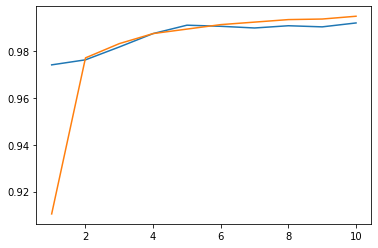

In [42]:
loss = result.history['loss']
acc = result.history['accuracy']
val_loss = result.history['val_loss']
val_acc = result.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, val_acc,label='Training val_accuracy')
plt.plot(epochs, acc,label='Training accuracy')

plt.show()

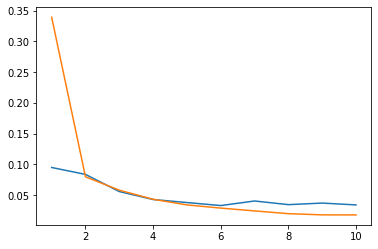

In [43]:
plt.figure()
plt.plot(epochs,val_loss, label='Training val_loss')
plt.plot(epochs,loss, label='Training loss')

plt.show()

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test)

281/281 [==============================] - 3s 9ms/step - loss: 0.0364 - accuracy: 0.9907


In [45]:
print(test_acc)

0.9907469153404236


**Conclusion**

The performance of this CNN model is good, the accuracy after 10 round of training is 0.9921, and the testing accuracy is 0.9907